<a href="https://colab.research.google.com/github/idamerce/moroccan-traffic-signs/blob/master/moroccan_traffic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# morocan mixt with germany

In [ ]:
!wget "https://github.com/t-lanigan/CarND-Traffic-Sign-Classifier-Project/raw/master/CarND-Traffic-Sign-Classifier-Project.zip" -O traffic_classifier.zip
!unzip traffic_classifier.zip

In [ ]:
!wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip" -O traffic_signs.zip
!unzip traffic_signs.zip

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:
data = []
labels = []
classes = 43
cur_path = "/content/GTSRB/Training" #os.getcwd() 

#Retrieving the images and their labels 
for i in range(classes):
    nbr_img='{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
    path = os.path.join(cur_path,str(nbr_img))
    images = os.listdir(path)
    for a in images:
      print(a)
      try:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)
      except:
        print("Error loading image")
        
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)




In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("germanyTraffic_model.h5")

In [ ]:
pip install gtts

In [ ]:
y_test = pd.read_csv('/content/dataset_ger-master/test/GT-final_test.csv',sep=";")
y_test.describe()
labels = y_test["ClassId"].values
imgs = y_test["Filename"].values

In [ ]:
from keras.models import load_model
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio  
import tensorflow as tf
from keras_preprocessing import image

model = load_model('germanyTraffic_model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'No parking or stopping', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right',
            26:'Road work', 
            27:'Traffic signals', ################
            28:'Pedestrians', 
            29:'Children crossing',
            30:'Bicycles crossing', 
            31:'No stopping',################
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons',
            44:'Road narrows on the left',################
            45:'Road narrows'} ################
            



clss_ar = { 1:'السرعة محدودة في عشرين كيلومتر فالساعة',
            2:'السرعة محدودة في ثلاثين كيلومتر فالساعة', 
            3:'السرعة محدودة في خمسين كيلومتر فالساعة',
            4:'السرعة محدودة في ستين كيلومتر فالساعة',
            5:'السرعة محدودة في سبعين كيلومتر فالساعة',
            6:'السرعة محدودة في ثمانين كيلومتر فالساعة',
            7:'نهاية منع محدودية السرعة قثمانين كلمتر فالساعة',
            8:'السرعة محدودة في مئة كيلومتر فالساعة',
            9:'السرعة محدودة في منة و عشرين كيلومتر فالساعة', 
            10:'ممنوع التجاوز', 
            11:'ممنوع التجاوز على الحافلات اللتي يتحاوز وونها 3.5 طن', 
            12:'الصغيرة فالكبيرة', 
            13:'ممنوع الوقوف أو التوقف', 
            14:'أعط الأسبقية', 
            15:'علامة التوقف', 
            16:'ممنوع المرور في الاتجاهين', 
            17:'ممنوع المرور بالنسبة للشاحنات اللي تفوق 3.5 طن', 
            18:'ممنوع المرور', 
            19:'انتباه خطر متنوع', 
            20:'منعرج خطير على اليسار', 
            21:'منعرج خطير على اليمين',
            22:'منعرج على اليسار ثم اليمين', 
            23:'طريق مسنم', 
            24:'طريق زالق', 
            25:'طريق ضيق من اليمين',
            26:'أشغال على الطريق', 
            27:'اشارات المرور', ################
            28:'مرور الراجلين', 
            29:'مرور الأطفال',
            30:'مرور الدراجات', 
            31:'ممنوع التوقف',################
            32:'مرور حيوانات متوحشة', 
            33:'نهاية المنع', 
            34:'اتجاه إجباري علي اليمين', 
            35:'اتجاه إجباري علي يسار', 
            36:'نتبع السهم على طول', 
            37:'أتبع السهم في ملتقى الطرق على طول أو اليمين', 
            38:'أتبع السهم في ملتقى الطرق على طول أو اليسار', 
            39:'إنعطاف إجباري على اليمين', 
            40:'إنعطاف إجباري على اليسار', 
            41:'إتجاه إجباري نتبع السهم على اليسار مع خفض السرعة', 
            42:'نهاية منع التجاوز', 
            43:'نهاية منع التجاوز على الشاحنات التي يتجاوز وزنها 3.5 طن',
            44:'طريق ضيق من اليسار',################            
            45:'منعرج على اليمين ثم اليسار',################
            46:'طريق ضيق'} 

def class_to_voice():
  sound_path="traffic_sound_signe"
  try:
    os.mkdir(sound_path)
  except:
    print("Error :cannot create this file my be already exist")
  for i in range(len(classes)):
    i=i+1
    print(i)
    engine = gTTS(classes[i]) 
    sound_file='a'+str(i)+'.wav' 
    print(sound_file)
    try:
      engine.save(sound_path+"/"+sound_file) 
      #Audio(sound_file, autoplay=True) 
    except:
      print("Error creating ",sound_file)


#class_to_voice()


def say_it(output):
  engine = gTTS(output)  
  engine.save('a1.wav') 
  sound_file = 'a1.wav'
  Audio(sound_file, autoplay=True) 

def classify(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='traffic_sound_signe/a'+str(pred+1)+'.wav'
    Audio(sound_sign, autoplay=True) 
    print(sign)
    #plt.imshow(img)
    return sound_sign

In [ ]:
from gtts import gTTS
def arabic_signs_to_speech():
  y_test = pd.read_csv('/content/classes.csv',sep=";")
  y_test.describe()
  labels = y_test["ClassId"].values
  sign = y_test["sign"].values
  MyClasses = {labels[i]:sign[i]+'' for i in range(len(labels)-1)}
  sound_path="morocco_traffic_signs"
  try:
    os.mkdir(sound_path)
  except:
    print("Error :cannot create this file my be already exist")
  for sg in range(1,len(MyClasses)+1):
    print(sg)
    engine = gTTS(''+MyClasses[sg],lang='ar')
    sound_file_name = 'a'+str(sg)+'.wav' 
    try:
      engine.save(sound_path+"/"+sound_file_name) 
    except:
      print("already exist")
  print("audio files are successfully done")    


arabic_signs_to_speech()


def classify_arabic(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = MyClasses[pred+1]
    sound_sign='morocco_traffic_signs/a'+str(pred+1)+'.wav'
    print(sign)
    #plt.imshow(img)
    return sound_sign



In [ ]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio

#predict_this_image="/content/49.png"
predict_this_image="/content/GTSRB/Training/00015/00003_00021.ppm"

imageh = Image.open(predict_this_image)
plt.imshow(imageh)
Audio(classify_arabic(predict_this_image), autoplay=True)


Priority road


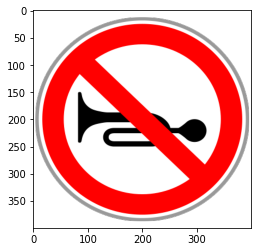

In [ ]:
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio

predict_this_image="/content/49.png"
#predict_this_image="/content/GTSRB/Training/00015/00003_00021.ppm"

imageh = Image.open(predict_this_image)
plt.imshow(imageh)
Audio(classify(predict_this_image), autoplay=True)



In [ ]:
from gtts import gTTS
tts = gTTS('طريق كتضياق', lang='ar')
tts.save('hello.mp3')
Audio('hello.mp3', autoplay=True)



In [ ]:
y_test = pd.read_csv('/content/classes.csv',sep=";")
y_test.describe()
labels = y_test["ClassId"].values
sign = y_test["sign"].values
MyClasses = {labels[i]:sign[i]+'' for i in range(len(labels)-1)}
print(MyClasses)




{1: 'جسر متحرك', 2: 'منعرج خطير على اليمين', 3: 'منعرج خطير على اليسار', 4: 'منعرجات متتالية أولها على اليمين', 5: 'منعرجات متتالية أولها على اليسار', 6: 'طريق مسنم', 7: 'مخفض للسرعة من نوع مسنم', 8: 'طريق ضيق', 9: 'طريق زالق', 10: 'طريق ضيق من اليمين', 11: 'طريق ضيق من اليسار', 12: 'خروج دراجات عادية', 13: 'تقاطع طريق مع سكة حديدية مجهزة بحواجز ذات تشغيل يدوي', 14: 'تقاطع طريق مع سكة حديدية بدون حواجز أو نصف حواجز', 15: 'تقاطع الطريق مع ترامواي أو مترو', 16: 'مكان يكتر فيه الأطفال', 17: 'ممر خاص بالمترجلين', 18: 'خطر آخر يمكن أن تبين لافتة الخطر', 19: 'إنتباه الحيوانات أليفة', 20: 'إنتباه الحيوانات أليفة', 21: 'إنتباه الحيوانات الغابة', 22: 'عبور الخيل', 23: 'منحدر خطير', 24: 'ضوء الكروازمة', 25: 'الطريق كتدي و تجيب', 26: 'تساقط الأحجار', 27: 'طريق تنتهي إلى رصيف أو حافة نهر', 28: 'إنتباه سكة القطار بالباريير أوطوماتيك و بلا عساس', 29: 'إتجاه الرياح', 30: 'خطر جوي', 31: 'إنتباه طريق كبيرة فصغيرة مول لكبيرة يدوز هو الأول', 32: 'إنتباه وجود حصى أو مزرار', 33: 'إنتباه ضاية الماء', 34: 'م

منعرج خطير على اليسار


In [ ]:
# Use list comprehension to build a dictionary from a da SearchCursor  
MyClasses = {labels[i]:sign[i]+'' for i in range(len(labels)-1)}
print(MyClasses)

# only moroccan

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:
!wget "https://github.com/idamerce/moroccan-traffic-signs/raw/master/data.zip" -O moroccangategorical_data.zip
!unzip moroccangategorical_data.zip

In [ ]:
data = []
labels = []
classes = 46
cur_path = "/content/data" #os.getcwd() 

#Retrieving the images and their labels 
for folder in os.listdir(cur_path):
    path = os.path.join(cur_path,str(folder))
    images = os.listdir(path)
    for a in images:
      print(a)
      try:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(folder)
      except:
        print("Error loading image")
        
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46  ) 

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("moroccan_traffic_category.h5")

In [ ]:
from keras.models import load_model
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio  
import tensorflow as tf
from keras_preprocessing import image

model = load_model('germanyTraffic_model.h5')
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'No parking or stopping', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right',
            26:'Road work', 
            27:'Traffic signals', ################
            28:'Pedestrians', 
            29:'Children crossing',
            30:'Bicycles crossing', 
            31:'No stopping',################
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons',
            44:'Road narrows on the left',################
            45:'Road narrows'} ################
            



clss_ar = { 1:'السرعة محدودة في عشرين كيلومتر فالساعة',
            2:'السرعة محدودة في ثلاثين كيلومتر فالساعة', 
            3:'السرعة محدودة في خمسين كيلومتر فالساعة',
            4:'السرعة محدودة في ستين كيلومتر فالساعة',
            5:'السرعة محدودة في سبعين كيلومتر فالساعة',
            6:'السرعة محدودة في ثمانين كيلومتر فالساعة',
            7:'نهاية منع محدودية السرعة قثمانين كلمتر فالساعة',
            8:'السرعة محدودة في مئة كيلومتر فالساعة',
            9:'السرعة محدودة في منة و عشرين كيلومتر فالساعة', 
            10:'ممنوع التجاوز', 
            11:'ممنوع التجاوز على الحافلات اللتي يتحاوز وونها 3.5 طن', 
            12:'الصغيرة فالكبيرة', 
            13:'ممنوع الوقوف أو التوقف', 
            14:'أعط الأسبقية', 
            15:'علامة التوقف', 
            16:'ممنوع المرور في الاتجاهين', 
            17:'ممنوع المرور بالنسبة للشاحنات اللي تفوق 3.5 طن', 
            18:'ممنوع المرور', 
            19:'انتباه خطر متنوع', 
            20:'منعرج خطير على اليسار', 
            21:'منعرج خطير على اليمين',
            22:'منعرج على اليسار ثم اليمين', 
            23:'طريق مسنم', 
            24:'طريق زالق', 
            25:'طريق ضيق من اليمين',
            26:'أشغال على الطريق', 
            27:'اشارات المرور', ################
            28:'مرور الراجلين', 
            29:'مرور الأطفال',
            30:'مرور الدراجات', 
            31:'ممنوع التوقف',################
            32:'مرور حيوانات متوحشة', 
            33:'نهاية المنع', 
            34:'اتجاه إجباري علي اليمين', 
            35:'اتجاه إجباري علي يسار', 
            36:'نتبع السهم على طول', 
            37:'أتبع السهم في ملتقى الطرق على طول أو اليمين', 
            38:'أتبع السهم في ملتقى الطرق على طول أو اليسار', 
            39:'إنعطاف إجباري على اليمين', 
            40:'إنعطاف إجباري على اليسار', 
            41:'إتجاه إجباري نتبع السهم على اليسار مع خفض السرعة', 
            42:'نهاية منع التجاوز', 
            43:'نهاية منع التجاوز على الشاحنات التي يتجاوز وزنها 3.5 طن',
            44:'طريق ضيق من اليسار',################            
            45:'منعرج على اليمين ثم اليسار',################
            46:'طريق ضيق'} 

def class_to_voice():
  sound_path="traffic_sound_signe"
  try:
    os.mkdir(sound_path)
  except:
    print("Error :cannot create this file my be already exist")
  for i in range(len(classes)):
    i=i+1
    print(i)
    engine = gTTS(classes[i]) 
    sound_file='a'+str(i)+'.wav' 
    print(sound_file)
    try:
      engine.save(sound_path+"/"+sound_file) 
      #Audio(sound_file, autoplay=True) 
    except:
      print("Error creating ",sound_file)


#class_to_voice()


def say_it(output):
  engine = gTTS(output)  
  engine.save('a1.wav') 
  sound_file = 'a1.wav'
  Audio(sound_file, autoplay=True) 

def classify(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='traffic_sound_signe/a'+str(pred+1)+'.wav'
    Audio(sound_sign, autoplay=True) 
    print(sign)
    #plt.imshow(img)
    return sound_sign


def classify_arabic(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = MyClasses[pred+1]
    sound_sign='morocco_traffic_signs/a'+str(pred+1)+'.wav'
    print(sign)
    #plt.imshow(img)
    return sound_sign

In [ ]:
#ARABIC TEST

from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio

#predict_this_image="/content/49.png"
predict_this_image="/content/GTSRB/Training/00015/00003_00021.ppm"

imageh = Image.open(predict_this_image)
plt.imshow(imageh)
Audio(classify_arabic(predict_this_image), autoplay=True)


In [ ]:
import tensorflow as tf
from keras_preprocessing import image

file_path="/content/49.png"
MyClasses={1:"a", 2:"b", 3:"c", 4:"d"}
model = load_model('moroccan_traffic_category.h5')
img = image.load_img(file_path, target_size=(30, 30))
img = np.expand_dims(img, axis=0)
img = np.array(img)


In [ ]:
pred = model.predict_classes([img])[0]
sign = MyClasses[pred+1]
print(sign)

# flip

In [ ]:
from PIL import Image, ImageOps
import shutil

saving_dir="newflipped21img"
try:
  shutil.remtree(saving_dir)
except:
  print("error")

try:
  os.mkdir(saving_dir)
except:
  print("error")

for img in os.listdir("/content/21"):
  im = Image.open("/content/21/"+img)
  title="00044"+img[5:21]
  print(title)
  im_mirror = ImageOps.mirror(im)
  im_mirror.save('/content/newflipped21img/'+title, quality=95)


In [ ]:
dir_name="/content/newflipped21img" 
shutil.make_archive("fl21_", 'zip', dir_name)

'/content/fl21_.zip'

# data generator

In [ ]:
import shutil
shutil.rmtree(path_gen)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

Number_Of_Image_To_Generate=20
pic = load_img('/content/49.png')
path_gen="imgss"
saving_dir="/content/"+path_gen
format ='png'
batchSize=1# batch_size: At a time, how many image should be created.
datagen_with_flip = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./300,
        shear_range=0.2,
        zoom_range=0.5,
        fill_mode='nearest')

try:
  os.mkdir(path_gen)
except:
  print("folder already exists")


In [ ]:

pic_array = img_to_array(pic)
# Image dimension
pic_array.shape 

# Converting into 4 dimension array
pic_array = pic_array.reshape((1,) + pic_array.shape)
pic_array.shape

# Generate Number_Of_Image_To_Generate images

count = 0
for batch in datagen.flow(pic_array, batch_size=batchSize,save_to_dir=saving_dir, save_format=format):
    count += 1
    if count >= Number_Of_Image_To_Generate:
        break


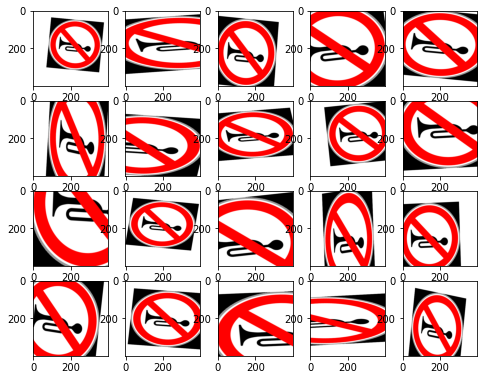

In [ ]:
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
i=1

for img in os.listdir(saving_dir):
  image=Image.open(generated_data+"/"+img)
  fig.add_subplot(rows, columns, i)
  plt.imshow(image)
  i=i+1
plt.show()





# generate img

In [ ]:
import shutil
shutil.rmtree("/content/new43")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
Number_Of_Image_To_Generate=1
#pic = load_img('/content/00024_00000_00010.png')
path_gen="new434"
saving_dir="/content/"+path_gen
format ='png'
batchSize=1# batch_size: At a time, how many image should be created.
datagen = ImageDataGenerator(
        horizontal_flip=True,
        fill_mode='nearest')
try:
  os.mkdir(path_gen)
except:
  print("folder already exists")
i=0
j=0
from_path="/content/43"
for img in os.listdir(from_path):
  try:

    pict=load_img(from_path+"/"+img)
    pic_array = img_to_array(pict)

    # Image dimension
    pic_array.shape 
    # Converting into 4 dimension array
    pic_array = pic_array.reshape((1,) + pic_array.shape)
    pic_array.shape
    if j<30:
      nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
      j=j+1
    else:
      j=0
      nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
      j=j+1
      i=i+1
    nbr = '{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
    print("00024_"+nbr+"_"+nbr2)
      # Generate Number_Of_Image_To_Generate images
    count = 0
    for batch in datagen.flow(pic_array, batch_size=batchSize,save_to_dir=saving_dir,save_prefix=img, save_format=format):
      count += 1
      if count >= Number_Of_Image_To_Generate:
        break

  except:
    print("----->",img)


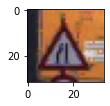

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
i=1

for img in os.listdir(saving_dir):
  image=Image.open(saving_dir+"/"+img)
  fig.add_subplot(rows, columns, i)
  plt.imshow(image)
  i=i+1
plt.show()


In [ ]:
dir_name="/content/output" 
shutil.make_archive("43_", 'zip', dir_name)

'/content/43_.zip'

In [ ]:
!unzip /content/43/43.zip

In [ ]:
#rename images
i=0
j=0
from_path="/content/new434"
os.mkdir("new43imgs")
for img in os.listdir(from_path):
  if j<30:
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
  else:
    j=0
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
    i=i+1
  nbr = '{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
  os.rename(r''+from_path+"/"+img,r"/content/new43imgs/00043_"+nbr+"_"+nbr2+".png")

In [ ]:
i=0
j=0
for img in os.listdir("/content/43"):
  if j<30:
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
  else:
    j=0
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
    i=i+1
  nbr = '{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
  os.remove("/content/00043_"+nbr+"_"+nbr2+".png")
  #print("/content/00043_"+nbr+"_"+nbr2+".png")

In [ ]:
import PIL
from PIL import Image
import shutil
shutil.rmtree("/content/output")
try:
  os.mkdir("output")
except:
  print("===>error")
path="/content/43"
for img in os.listdir(path):
  try:
    im = Image.open(path+"/"+img)
    out = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    out.save("/content/output/"+img)
  except:
    print("===>error")  
  print(img)
  #flip image

  #im = Image.open("/output/"+img)
  #plt.imshow(im)

In [ ]:
  im = Image.open("/content/output/"+img)
  plt.imshow(im)

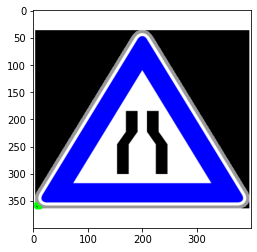

In [ ]:
import cv2
import numpy as np
img = cv2.imread('/content/8.png')
#img = cv2.imread('/content/00043_00000_00010.png')

#img = img.resize(8,8)
blur = cv2.GaussianBlur(img,(5,5),0)
values = [30, 40, 50, 60, 70, 80, 90]
gray_image = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
for i in values:
  ret, threshold = cv2.threshold(gray_image,i,255,cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  area = sorted(contours, key=cv2.contourArea, reverse=True)
  for j in range(1, len(area)):
    contour = area[j]
  size = cv2.contourArea(contour)
  if 10 < float(size) < 140000:
    cv2.drawContours(img, [contour], -1, (0,255,0), 2)
    plt.imshow(img)

In [ ]:
import numpy as np
import cv2 as cv
ii= Image.open("/content/00043_00000_00010.png")
im = cv.imread("/content/00043_00000_00010.png")
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(im)
print(hierarchy)

resizing

In [ ]:
import numpy as np
import cv2 as cv
img= Image.open("/content/00043_00000_00010.png")
#size=[(27,26),(28,27),(26,27),(27,27),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27)]

shutil.rmtree("/content/out")
os.mkdir("out")

for im in os.listdir("/content/44"):
  index=im[6:11]
  try:
    im=Image.open("/content/44/"+im)
  except:
    print("error")
  print("-->",index)
  for img in os.listdir("/content/43"):
    path="/content/43/"+img
   
    index_2=img[6:11]
    if index == index_2:
      print("-->",img[6:11])
      try:
        image =Image.open(path)
        size  =image.size
        im = im.resize(size, Image.ANTIALIAS)
        im.save("/content/out/"+img) 
      except:
        print("error2")



In [ ]:
!unzip /content/44/44.zip

In [ ]:
dir_name="/content/out" 
shutil.make_archive("44_", 'zip', dir_name)

'/content/44_.zip'

In [ ]:
import numpy as np
import cv2 as cv
img= Image.open("/content/00043_00000_00010.png")
#size=[(27,26),(28,27),(26,27),(27,27),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27)]

shutil.rmtree("/content/out")

os.mkdir("out")

for im in os.listdir("/content/44"):
  index=im[6:11]
  try:
    im=Image.open("/content/44/"+im)
  except:
    print("error")
  print("-->",index)
  for img in os.listdir("/content/43"):
    path="/content/43/"+img
   
    index_2=img[6:11]
    if index == index_2:
      print("-->",img[6:11])
      try:
        image =Image.open(path)
        size  =image.size
        im = im.resize(size, Image.ANTIALIAS)
        im.save("/content/out/"+img) 
      except:
        print("error2")

        

In [ ]:
!unzip /content/45.zip

In [ ]:
import numpy as np
import cv2 as cv
img= Image.open("/content/00043_00000_00010.png")
#size=[(27,26),(28,27),(26,27),(27,27),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(27,26),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27),(28,27),(26,27)]

shutil.rmtree("/content/out45")

os.mkdir("out")

for im in os.listdir("/content/45"):
  index=im[6:11]
  try:
    im=Image.open("/content/45/"+im)
  except:
    print("error")
  print("-->",index)
  for img in os.listdir("/content/12"):
    path="/content/12/"+img
   
    index_2=img[6:11]
    if index == index_2:
      print("-->",img[6:11])
      try:
        image =Image.open(path)
        size  =image.size
        im = im.resize(size, Image.ANTIALIAS)
        im.save("/content/out45/"+img) 
      except:
        print("error2")

# generate data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/My Drive/12.zip"

In [ ]:
!unzip "/content/drive/My Drive/45.zip"

In [ ]:
!unzip "/content/drive/My Drive/img.zip"

In [ ]:
!unzip "/content/drive/My Drive/40.zip"

In [ ]:
!unzip "/content/drive/My Drive/21.zip"

In [ ]:
import numpy as np
import cv2 as cv
import shutil

try:
  shutil.rmtree("/content/outimg")
except:
  print("error  deleting file")

try:
  os.mkdir("outimg")
except:
  print("error creating file")

for im in os.listdir("/content/img/"):
  index=im[6:11]
  try:
    im=Image.open("/content/img/"+im)
  except:
    print("error")
  print("-->",index)
  for img in os.listdir("/content/12"):
    path="/content/12/"+img
   
    index_2=img[6:11]
    if index == index_2:
      print("-->",img[6:11])
      try:
        image =Image.open(path)
        size  =image.size
        im = im.resize(size, Image.ANTIALIAS)
        im.save("/content/outimg/"+img) 
      except:
        print("error2")

In [ ]:
#rename images
import shutil
shutil.rmtree("/content/newOutimg")

i=0
j=0
from_path="/content/out45"
os.mkdir("newOutimg")

for img in os.listdir(from_path):
  if j<19:
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
  else:
    j=0
    nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
    j=j+1
    i=i+1
  nbr = '{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
  os.rename(r''+from_path+"/"+img,r"/content/newOutimg/00030_"+nbr+"_"+nbr2+".png")
  print("/content/newOutimg/00030_"+nbr+"_"+nbr2+".png")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
Number_Of_Image_To_Generate=1
path_gen="flipped40"
saving_dir="/content/"+path_gen
format ='png'
batchSize=1# batch_size: At a time, how many image should be created.
datagen = ImageDataGenerator(
        horizontal_flip=True,
        fill_mode='nearest')
import shutil
shutil.rmtree(saving_dir)

try:
  os.mkdir(path_gen)
except:
  print("folder already exists")
i=0
j=0
from_path="/content/40"
for img in os.listdir(from_path):
  try:
    pict=load_img(from_path+"/"+img)
    pic_array = img_to_array(pict)

    # Image dimension
    pic_array.shape 
    # Converting into 4 dimension array
    pic_array = pic_array.reshape((1,) + pic_array.shape)
    pic_array.shape
    if j<30:
      nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
      j=j+1
    else:
      j=0
      nbr2= '{0:0{width}}'.format(int(j)+int('00000'), width=max(len(str(j)),len('00000')))
      j=j+1
      i=i+1
    nbr = '{0:0{width}}'.format(int(i)+int('00000'), width=max(len(str(i)),len('00000')))
    print("00045_"+nbr+"_"+nbr2)
    # Generate Number_Of_Image_To_Generate images
    count = 0
    for batch in datagen.flow(pic_array, batch_size=batchSize,save_to_dir=saving_dir,save_prefix=img, save_format=format):
      count += 1
      if count >= Number_Of_Image_To_Generate:
        break
  except:
    print("----->",img)

In [ ]:
import os
try:
  os.mkdir("flippednamed40")
except:
  print("error")
for img in os.listdir("/content/flipped40"):
  os.rename(r''+'/content/flipped40'+"/"+img,r'/content/flippednamed40/'+img[:21])
  #print("---",img[:21])


In [ ]:
dir_name="/content/flippednamed40" 
shutil.make_archive("40_", 'zip', dir_name)

# new moroccan model training

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:

!wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB-Training_fixed.zip" -O GTSRB.zip
!unzip mydata.zip

In [ ]:
!unzip mydata.zip

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:
data = []
labels = []
classes = 46
cur_path = "/content/data" #os.getcwd() 

#Retrieving the images and their labels 
for folder in os.listdir(cur_path):
    path = os.path.join(cur_path,str(folder))
    images = os.listdir(path)
    for a in images:
      print(a)
      try:
        image = Image.open(path + '/'+ a)
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(folder)
      except:
        print("Error loading image")
        
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46  ) 

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("moroccan_traffic_category.h5")

In [ ]:
import numpy as np
import cv2 as cv
import shutil
from PIL import Image
import cv2


#rawdata/00000.bmp 1 2 7 51 39
#rawdata/00922.bmp 1 4 6 60 56
img = cv2.imread("/content/00000.bmp", cv2.IMREAD_UNCHANGED)
dimensions = img.shape
another=cv2.resize(img, (30, 30))
print('Image Dimension:',dimensions,"----------------",another )

img = cv2.imread("/content/00922.bmp", cv2.IMREAD_UNCHANGED)
dimensions = img.shape
another=cv2.resize(img, (30, 30))

print('Image Dimension:',dimensions,"----------------",another) 



image =Image.open("/content/00000.bmp")
size  =image.size
image =Image.open("/content/00922.bmp")
size  =image.size
print("-->",size)

# getting data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import zipfile

directory_to_extract_to="/content/data"
for i in range(2,46,2):
  file=str(i)+str(i+1)
  print("---->",file)
  try:
    path_to_zip_file="/content/drive/My Drive/moroccan trafic dataset/"+file+".zip"
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
       zip_ref.extractall(directory_to_extract_to)
  except:
    print("error")


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt

In [8]:
data = []
labels = []
classes = 46
cur_path = "/content/data" #os.getcwd() 

#Retrieving the images and their labels 
for folder in os.listdir(cur_path):
    path = os.path.join(cur_path,str(folder))
    images = os.listdir(path)
    for a in images:
      print(a)
      try:
        image = Image.open(path + '/'+ a).convert('RGB')
        image = image.resize((30,30))
        image = np.array(image)
        sim = Image.fromarray(image)
        data.append(image)
        labels.append(folder)
      except:
        print("Error loading image")
        
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46  ) 

Streaming output truncated to the last 5000 lines.
00038_00020_00026.png
00038_00047_00024.png
00038_00008_00007.png
00038_00037_00011.png
00038_00045_00003.png
00038_00016_00016.png
00038_00028_00018.png
00038_00032_00008.png
00038_00052_00013.png
00038_00059_00021.png
00038_00055_00026.png
00038_00055_00002.png
00038_00054_00020.png
00038_00039_00013.png
00038_00036_00020.png
00038_00021_00003.png
00038_00055_00018.png
00038_00060_00008.png
00038_00033_00009.png
00038_00001_00003.png
00038_00020_00001.png
00038_00037_00022.png
00038_00064_00027.png
00038_00000_00011.png
00038_00023_00011.png
00038_00068_00004.png
00038_00011_00021.png
00038_00049_00018.png
00038_00057_00023.png
00038_00024_00017.png
00038_00061_00011.png
00038_00054_00024.png
00038_00067_00022.png
00038_00018_00013.png
00038_00056_00004.png
00038_00031_00026.png
00038_00058_00029.png
00038_00064_00001.png
00038_00024_00002.png
00038_00049_00026.png
00038_00026_00011.png
00038_00061_00004.png
00038_00033_00015.png
000

In [9]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

model.save("moroccan_traffic_category.h5")

Epoch 1/30
947/947 [==============================] - 128s 135ms/step - loss: 1.9726 - accuracy: 0.5297 - val_loss: 0.3937 - val_accuracy: 0.9101
Epoch 2/30
947/947 [==============================] - 124s 130ms/step - loss: 0.5388 - accuracy: 0.8475 - val_loss: 0.1530 - val_accuracy: 0.9610
Epoch 3/30
947/947 [==============================] - 124s 131ms/step - loss: 0.3384 - accuracy: 0.9066 - val_loss: 0.0898 - val_accuracy: 0.9771
Epoch 4/30
947/947 [==============================] - 123s 130ms/step - loss: 0.2589 - accuracy: 0.9295 - val_loss: 0.0587 - val_accuracy: 0.9847
Epoch 5/30
947/947 [==============================] - 123s 130ms/step - loss: 0.2455 - accuracy: 0.9344 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 6/30
947/947 [==============================] - 126s 133ms/step - loss: 0.2151 - accuracy: 0.9448 - val_loss: 0.0566 - val_accuracy: 0.9861
Epoch 7/30
947/947 [==============================] - 123s 129ms/step - loss: 0.2225 - accuracy: 0.9421 - val_loss: 0.0487 -

In [ ]:
pip install gtts

In [18]:
from keras.models import load_model
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio  
import tensorflow as tf
from keras_preprocessing import image

model = load_model('moroccan_traffic_category.h5')
#dictionary to label all traffic signs class.
classes = { 1:'السرعة محدودة في عشرين كيلومتر فالساعة',
            2:'السرعة محدودة في ثلاثين كيلومتر فالساعة', 
            3:'السرعة محدودة في خمسين كيلومتر فالساعة',
            4:'السرعة محدودة في ستين كيلومتر فالساعة',
            5:'السرعة محدودة في سبعين كيلومتر فالساعة',
            6:'السرعة محدودة في ثمانين كيلومتر فالساعة',
            7:'نهاية منع محدودية السرعة قثمانين كلمتر فالساعة',
            8:'السرعة محدودة في مئة كيلومتر فالساعة',
            9:'السرعة محدودة في منة و عشرين كيلومتر فالساعة', 
            10:'ممنوع التجاوز', 
            11:'ممنوع التجاوز على الحافلات اللتي يتحاوز وونها 3.5 طن', 
            12:'الصغيرة فالكبيرة', 
            13:'ممنوع الوقوف أو التوقف', 
            14:'أعط الأسبقية', 
            15:'علامة التوقف', 
            16:'ممنوع المرور في الاتجاهين', 
            17:'ممنوع المرور بالنسبة للشاحنات اللي تفوق 3.5 طن', 
            18:'ممنوع المرور', 
            19:'انتباه خطر متنوع', 
            20:'منعرج خطير على اليسار', 
            21:'منعرج خطير على اليمين',
            22:'منعرج على اليسار ثم اليمين', 
            23:'طريق مسنم', 
            24:'طريق زالق', 
            25:'طريق ضيق من اليمين',
            26:'أشغال على الطريق', 
            27:'اشارات المرور', ################
            28:'مرور الراجلين', 
            29:'مرور الأطفال',
            30:'مرور الدراجات', 
            31:'ممنوع التوقف',################
            32:'مرور حيوانات متوحشة', 
            33:'نهاية المنع', 
            34:'اتجاه إجباري علي اليمين', 
            35:'اتجاه إجباري علي يسار', 
            36:'نتبع السهم على طول', 
            37:'أتبع السهم في ملتقى الطرق على طول أو اليمين', 
            38:'أتبع السهم في ملتقى الطرق على طول أو اليسار', 
            39:'إنعطاف إجباري على اليمين', 
            40:'إنعطاف إجباري على اليسار', 
            41:'إتجاه إجباري نتبع السهم على اليسار مع خفض السرعة', 
            42:'نهاية منع التجاوز', 
            43:'نهاية منع التجاوز على الشاحنات التي يتجاوز وزنها 3.5 طن',
            44:'طريق ضيق من اليسار',################            
            45:'منعرج على اليمين ثم اليسار',################
            46:'طريق ضيق'} 

def class_to_voice(classes,language):
  sound_path="traffic_sound_signs_"+language
  try:
    os.mkdir(sound_path)
  except:
    print("Error :cannot create this file my be already exist")
  for i in range(len(classes)):
    i=i+1
    print(i)
    engine = gTTS(classes[i],lang=language) 
    sound_file='a'+str(i)+'.wav' 
    print(sound_file)
    try:
      engine.save(sound_path+"/"+sound_file) 
      #Audio(sound_file, autoplay=True) 
    except:
      print("Error creating ",sound_file)


#class_to_voice(classes,'ar')


def say_it(output):
  engine = gTTS(output)  
  engine.save('a1.wav') 
  sound_file = 'a1.wav'
  Audio(sound_file, autoplay=True) 

def classify(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='/content/traffic_sound_signs_en/a'+str(pred+1)+'.wav'
    Audio(sound_sign, autoplay=True) 
    print(sign)
    #plt.imshow(img)
    return sound_sign


def classify_arabic(file_path):
    global label_packed
    img = image.load_img(file_path, target_size=(30, 30))
    img = np.expand_dims(img, axis=0)
    img = np.array(img)
    pred = model.predict_classes([img])[0]
    sign = classes[pred+1]
    sound_sign='/content/traffic_sound_signs_ar/a'+str(pred+1)+'.wav'
    print(sign)
    #plt.imshow(img)
    return sound_sign

أشغال على الطريق


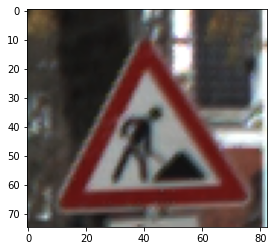

In [30]:
#ARABIC TEST

from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio

#predict_this_image="/content/00005.png"
predict_this_image="/content/00044_00004_00025.png"
predict_this_image="/content/00005.png"
predict_this_image="/content/00164.png"
predict_this_image="/content/00291.png"
predict_this_image="/content/00573.png"
predict_this_image="/content/00613.png"
predict_this_image="/content/00623.png" #this not exist in my model
predict_this_image="/content/00640.png"
predict_this_image="/content/00929.png"
predict_this_image="/content/01033.png"
predict_this_image="/content/01204.png"
predict_this_image="/content/01480.png"

imageh = Image.open(predict_this_image)
plt.imshow(imageh)
Audio(classify_arabic(predict_this_image), autoplay=True)


In [ ]:
pred = model.predict_classes([img])[0]
sign = MyClasses[pred+1]
print(sign)